# Loan Approval Classification and Risk Score Regression.
 <b> This project analyzes a dataset to predict loan approval outcomes based on applicant data. </b>

Using preprocessing and exploratory data analysis (EDA), the notebook prepares the dataset by cleaning, visualizing distributions, and examining key factors that may influence loan approval.

## Problem Statement

- The project Loan Approval Classification aims to develop a predictive model or system that can identify whether individuals will be approved for Loan or not by indentifying critical factors and patterns in applicant data to improve the accuracy.

## Dataset Link
- https://www.kaggle.com/datasets/lorenzozoppelletto/financial-risk-for-loan-approval

## Importing Data and Required Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Loan.csv')

## Attributes Information

In [3]:
df.head(10)

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0
5,2018-01-06,37,178310,626,Self-Employed,Master,16,15433,72,Married,...,14859.166667,0.756079,5,27071,0.217433,0.217601,385.577074,0.075211,1,44.0
6,2018-01-07,58,51250,564,Employed,High School,39,12741,48,Married,...,4270.833333,0.884275,5,21730,0.225741,0.205271,391.300352,0.170529,0,50.0
7,2018-01-08,49,97345,516,Employed,High School,23,19634,12,Divorced,...,8112.083333,0.933492,5,38621,0.226634,0.209113,1827.360055,0.260767,1,42.4
8,2018-01-09,34,116841,603,Employed,Bachelor,12,55353,60,Divorced,...,9736.750000,0.728397,3,7711,0.258853,0.291539,1762.199026,0.246509,0,61.0
9,2018-01-10,46,40615,612,Employed,Associate,19,25443,12,Married,...,3384.583333,0.615323,3,116812,0.184443,0.197271,2353.577424,0.903384,0,53.0


In [4]:
df = df.drop(['ApplicationDate'], axis = 1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         20000 non-null  int64  
 1   AnnualIncome                20000 non-null  int64  
 2   CreditScore                 20000 non-null  int64  
 3   EmploymentStatus            20000 non-null  object 
 4   EducationLevel              20000 non-null  object 
 5   Experience                  20000 non-null  int64  
 6   LoanAmount                  20000 non-null  int64  
 7   LoanDuration                20000 non-null  int64  
 8   MaritalStatus               20000 non-null  object 
 9   NumberOfDependents          20000 non-null  int64  
 10  HomeOwnershipStatus         20000 non-null  object 
 11  MonthlyDebtPayments         20000 non-null  int64  
 12  CreditCardUtilizationRate   20000 non-null  float64
 13  NumberOfOpenCreditLines     200

## Exploratory Data Analysis (EDA)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,20000.0,39.752600,11.622713,18.000000,32.000000,40.000000,48.000000,8.000000e+01
AnnualIncome,20000.0,59161.473550,40350.845168,15000.000000,31679.000000,48566.000000,74391.000000,4.853410e+05
CreditScore,20000.0,571.612400,50.997358,343.000000,540.000000,578.000000,609.000000,7.120000e+02
Experience,20000.0,17.522750,11.316836,0.000000,9.000000,17.000000,25.000000,6.100000e+01
LoanAmount,20000.0,24882.867800,13427.421217,3674.000000,15575.000000,21914.500000,30835.000000,1.847320e+05
LoanDuration,20000.0,54.057000,24.664857,12.000000,36.000000,48.000000,72.000000,1.200000e+02
NumberOfDependents,20000.0,1.517300,1.386325,0.000000,0.000000,1.000000,2.000000,5.000000e+00
MonthlyDebtPayments,20000.0,454.292700,240.507609,50.000000,286.000000,402.000000,564.000000,2.919000e+03
CreditCardUtilizationRate,20000.0,0.286381,0.159793,0.000974,0.160794,0.266673,0.390634,9.173801e-01
NumberOfOpenCreditLines,20000.0,3.023350,1.736161,0.000000,2.000000,3.000000,4.000000,1.300000e+01


In [7]:
df.describe(include = 'object')

,EmploymentStatus,EducationLevel,MaritalStatus,HomeOwnershipStatus,LoanPurpose
count,20000,20000,20000,20000,20000
unique,3,5,4,4,5
top,Employed,Bachelor,Married,Mortgage,Home
freq,17036,6054,10041,7939,5925


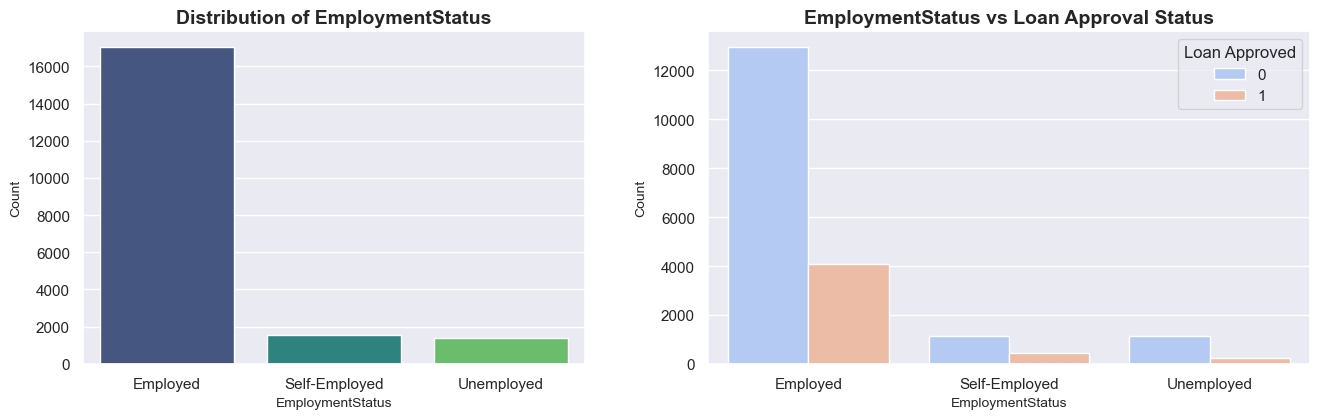

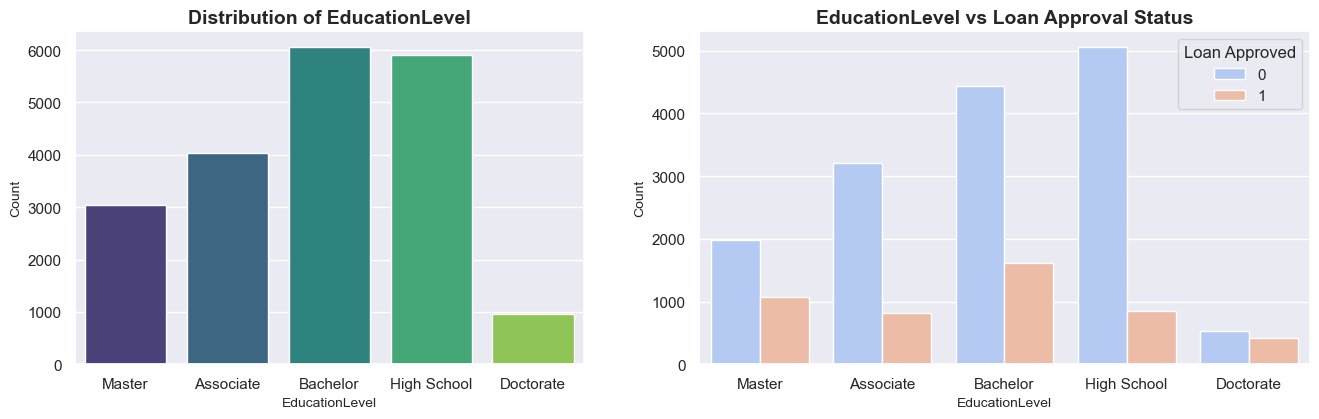

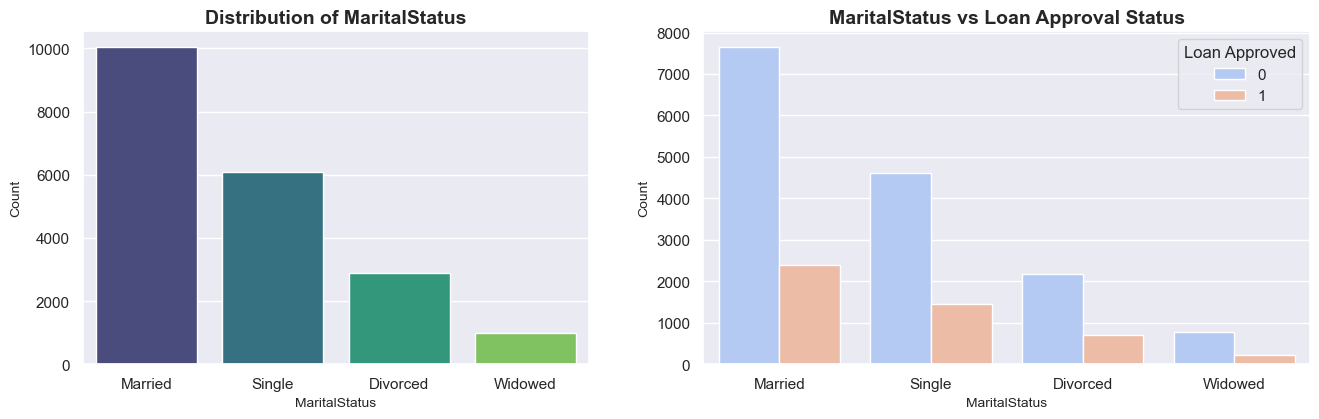

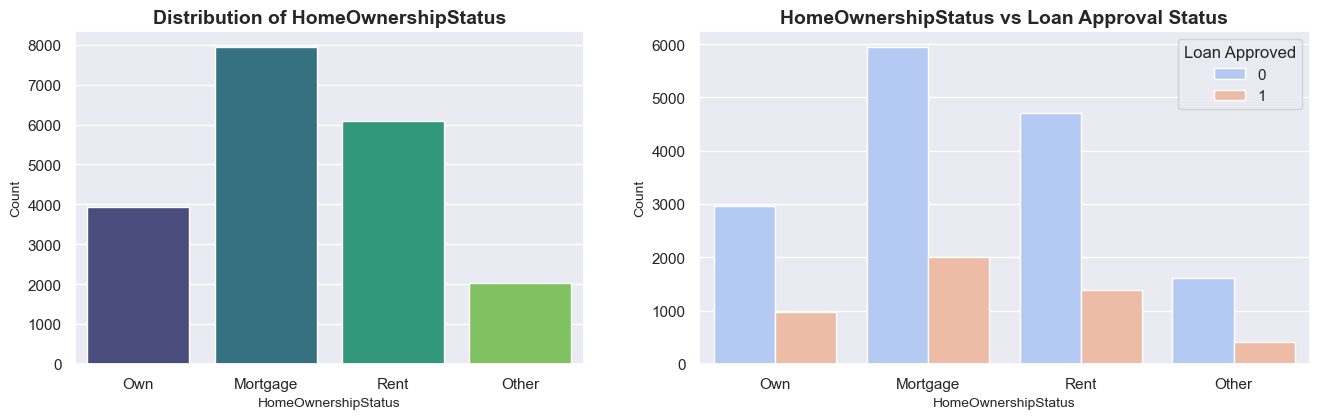

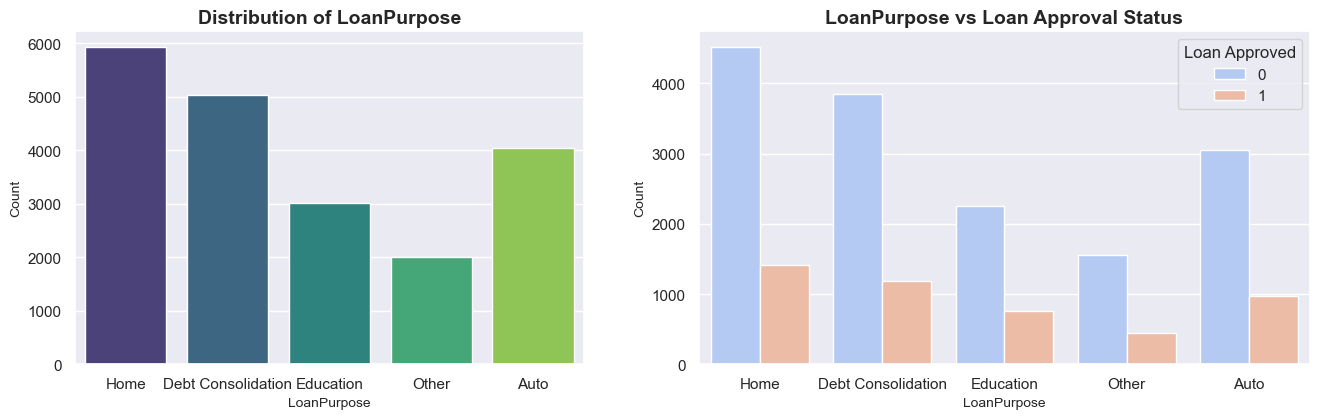

In [8]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# cat_column = df.select_dtypes('object').columns

# for c in cat_column:
#     fig, ax = plt.subplots(1,2,figsize=(10,4))
#     sns.countplot(df, x = c,ax = ax[0])    # stat = 'percent' not works here
#     sns.countplot(df, x = c,hue = 'LoanApproved',ax = ax[1]) # stat = 'percent' not works here
#     plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress specific warnings from seaborn
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Set a dark grid theme for aesthetics
sns.set_theme(style="darkgrid")

# Define color palettes for specific purposes
palette_main = sns.color_palette("viridis", 6)  # Using a maximum of 6 colors
palette_hue = sns.color_palette("coolwarm", 2)  # Only 2 colors for LoanApproved hue

cat_column = df.select_dtypes('object').columns

for c in cat_column:
    unique_values = df[c].nunique()
    # Adjust the main palette dynamically based on the number of unique values
    current_palette = sns.color_palette("viridis", min(unique_values, 6))

    fig, ax = plt.subplots(1, 2, figsize=(14, 5), gridspec_kw={'width_ratios': [1, 1.2]})

    # Countplot for the distribution of the categorical variable
    sns.countplot(data=df, x=c, ax=ax[0], palette=current_palette)
    ax[0].set_title(f'Distribution of {c}', fontsize=14, fontweight='bold')
    ax[0].tick_params(axis='x')
    ax[0].set_xlabel(c, fontsize=10)
    ax[0].set_ylabel('Count', fontsize=10)

    # Countplot for the categorical variable vs Loan Approval Status
    sns.countplot(data=df, x=c, hue='LoanApproved', ax=ax[1], palette=palette_hue)
    ax[1].set_title(f'{c} vs Loan Approval Status', fontsize=14, fontweight='bold')
    ax[1].tick_params(axis='x')
    ax[1].set_xlabel(c, fontsize=10)
    ax[1].set_ylabel('Count', fontsize=10)
    ax[1].legend(title='Loan Approved', loc='upper right', frameon=True)

    # Add a tight layout and spacing between subplots
    plt.tight_layout(pad=3)
    plt.show()


In [9]:
df['LoanApproved'].value_counts()


0    15220
1     4780
Name: LoanApproved, dtype: int64

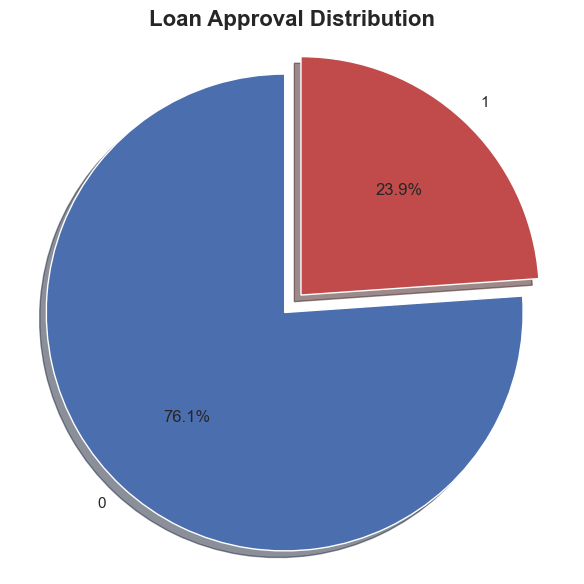

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already defined and contains the 'LoanApproved' column
loan_approval_counts = df['LoanApproved'].value_counts()

# Define a custom color palette that resembles the colors in your provided image
colors = ['#4b6eaf', '#c14b4b']  # Adjust these colors as needed based on your reference image

# Create a pie chart
plt.figure(figsize=(6,6))
plt.pie(loan_approval_counts, labels=loan_approval_counts.index, colors=colors,
        autopct='%1.1f%%', startangle=90, explode=(0.1, 0), shadow=True)

# Add a title
plt.title("Loan Approval Distribution", fontsize=16, fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.tight_layout()
plt.show()


<AxesSubplot:xlabel='AnnualIncome', ylabel='Count'>

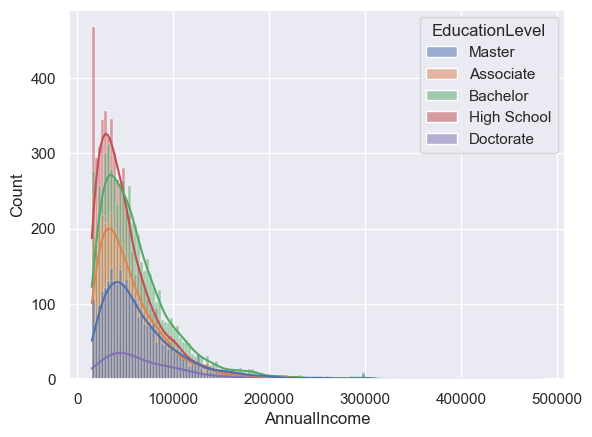

In [11]:
sns.histplot(df, x = 'AnnualIncome', hue = 'EducationLevel', kde= True)

<AxesSubplot:xlabel='AnnualIncome', ylabel='Count'>

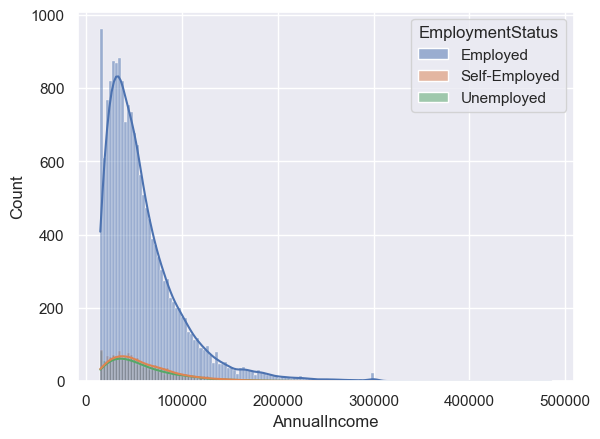

In [12]:
sns.histplot(df, x = 'AnnualIncome', hue = 'EmploymentStatus', kde= True)

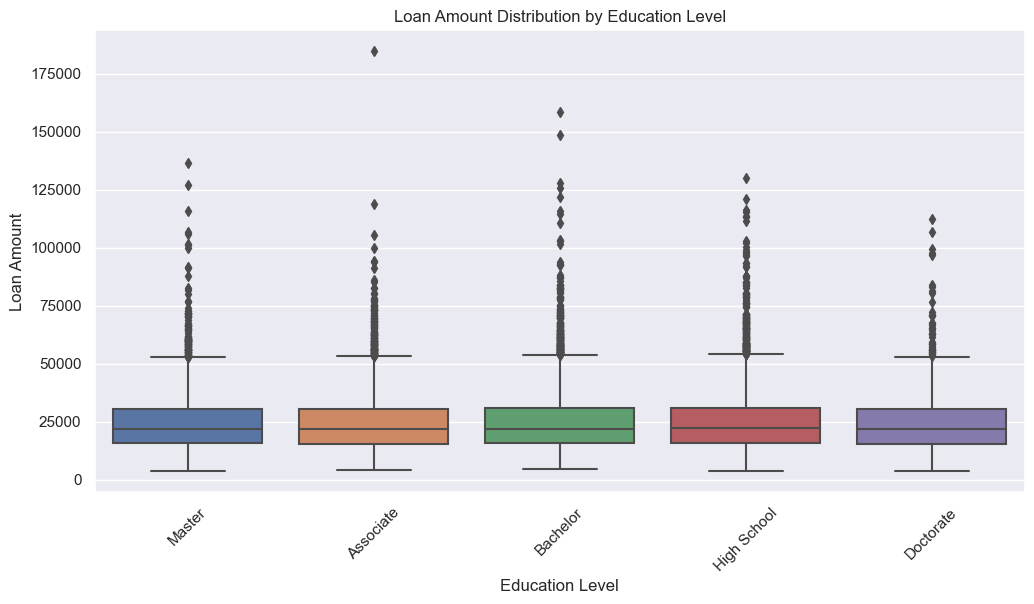

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='EducationLevel', y='LoanAmount', data=df)
plt.title('Loan Amount Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)
plt.show()


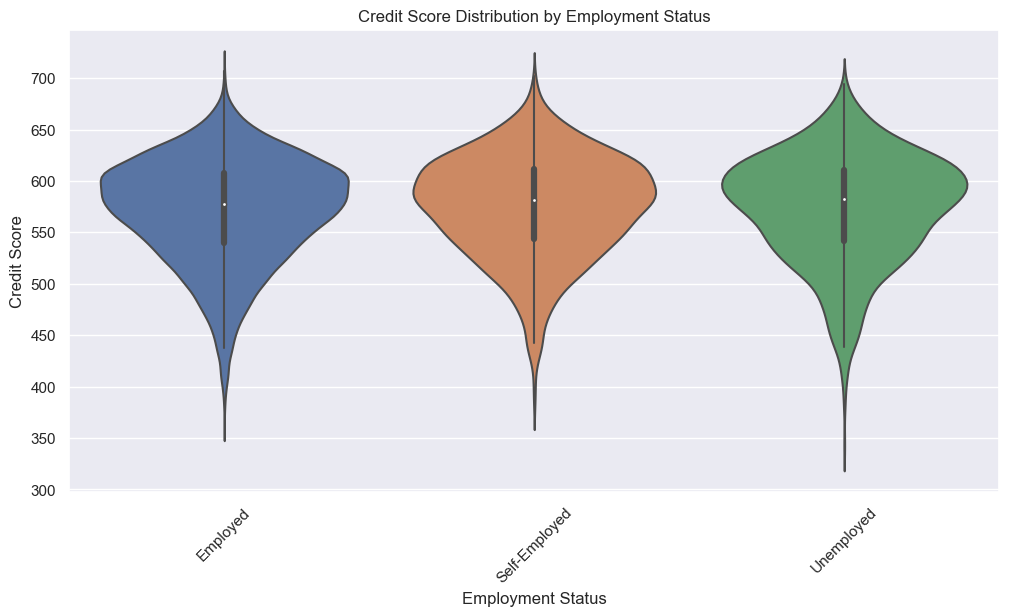

In [14]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='EmploymentStatus', y='CreditScore', data=df)
plt.title('Credit Score Distribution by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Credit Score')
plt.xticks(rotation=45)
plt.show()


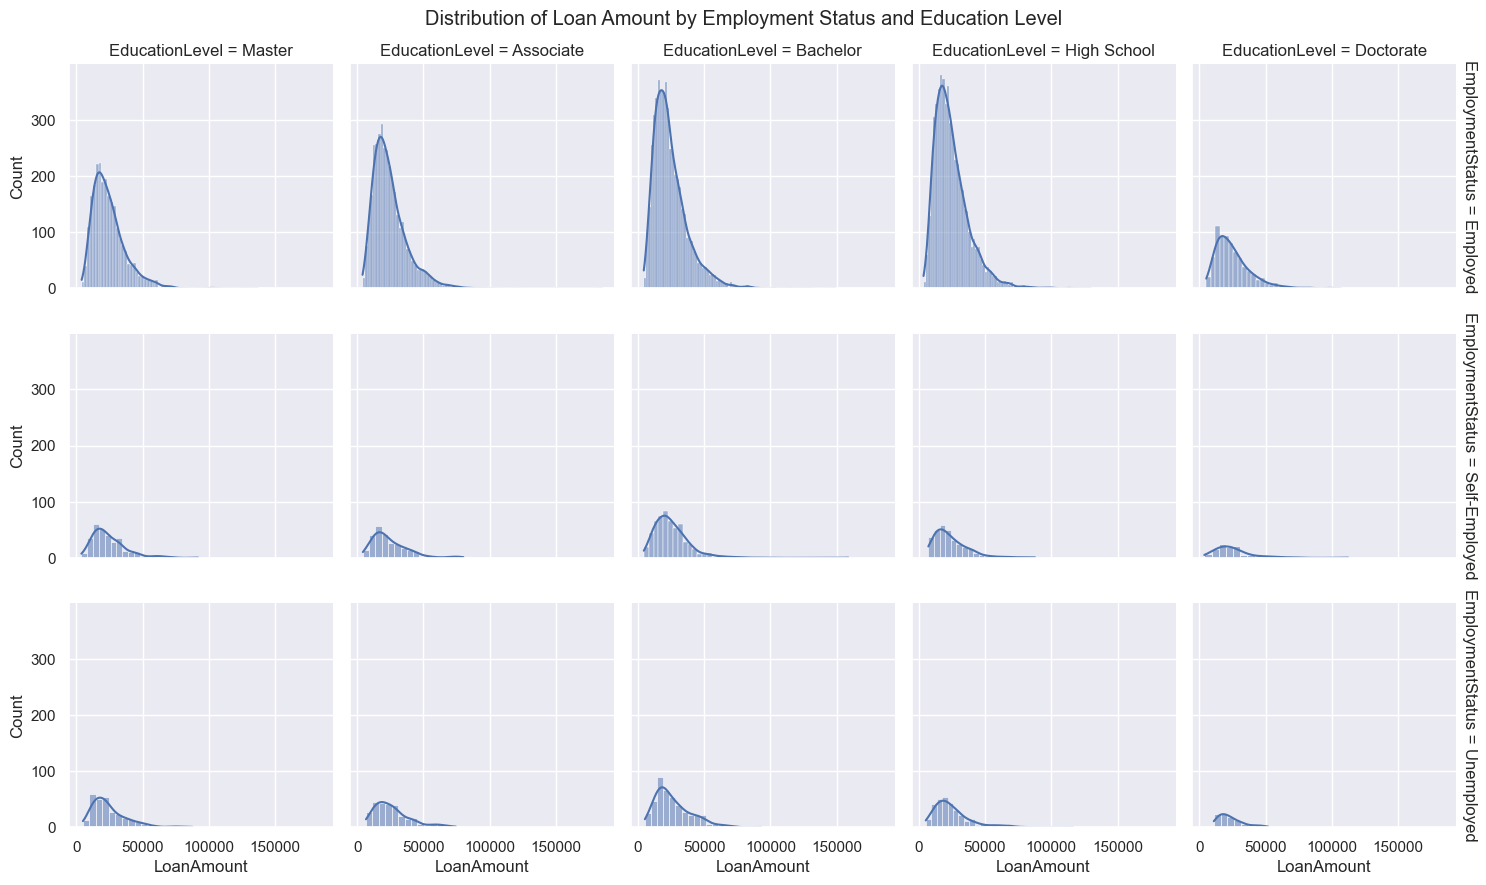

In [15]:
g = sns.FacetGrid(df, col='EducationLevel', row='EmploymentStatus', margin_titles=True)
g.map(sns.histplot, 'LoanAmount', kde=True)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Loan Amount by Employment Status and Education Level')
plt.tight_layout(pad=1)
plt.show()


In [19]:
corr_matrix = df.select_dtypes(include='number').corr()
corr_matrix

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
Age,1.000000,0.144774,0.323243,0.982980,-0.007492,-0.006992,-0.000287,0.015685,-0.001394,-0.001069,...,0.144634,-0.005601,-0.000773,0.014061,-0.238995,-0.202702,-0.021380,-0.111800,0.141029,-0.164304
AnnualIncome,0.144774,1.000000,0.104045,0.145999,-0.004116,0.002972,-0.001244,-0.001082,-0.007935,-0.008175,...,0.989911,-0.012351,-0.000610,-0.004358,-0.074549,-0.063832,-0.004304,-0.532033,0.597900,-0.483289
CreditScore,0.323243,0.104045,1.000000,0.327664,-0.010834,-0.000762,-0.014453,0.011153,-0.009650,-0.008780,...,0.104796,-0.006838,0.008069,0.001951,-0.722619,-0.598844,-0.063932,-0.115363,0.142000,-0.240198
Experience,0.982980,0.145999,0.327664,1.000000,-0.007921,-0.007924,0.000136,0.018629,-0.001751,-0.002143,...,0.145950,-0.006603,-0.000762,0.015049,-0.242871,-0.206252,-0.021691,-0.112825,0.140755,-0.166496
LoanAmount,-0.007492,-0.004116,-0.010834,-0.007921,1.000000,-0.000436,-0.007005,0.021103,0.000806,0.000769,...,-0.005407,-0.012107,0.005364,-0.003679,0.385663,0.322824,0.780828,0.457175,-0.239496,0.137981
LoanDuration,-0.006992,0.002972,-0.000762,-0.007924,-0.000436,1.000000,-0.001301,0.000068,-0.006160,0.001489,...,0.003067,-0.010105,0.003635,-0.008779,0.579215,0.487994,-0.385495,-0.213984,-0.094558,0.054550
NumberOfDependents,-0.000287,-0.001244,-0.014453,0.000136,-0.007005,-0.001301,1.000000,-0.002396,0.011544,0.006033,...,-0.000414,0.008735,0.010910,-0.008423,0.006977,0.006749,-0.001390,-0.000358,0.001717,0.001686
MonthlyDebtPayments,0.015685,-0.001082,0.011153,0.018629,0.021103,0.000068,-0.002396,1.000000,0.005420,0.006280,...,-0.000356,0.001638,0.005863,0.004430,0.000010,0.003895,0.018021,0.219453,-0.070415,0.036938
CreditCardUtilizationRate,-0.001394,-0.007935,-0.009650,-0.001751,0.000806,-0.006160,0.011544,0.005420,1.000000,0.001491,...,-0.009381,0.013040,-0.006979,-0.003506,0.003668,0.001030,0.004366,0.010490,-0.010466,0.108758
NumberOfOpenCreditLines,-0.001069,-0.008175,-0.008780,-0.002143,0.000769,0.001489,0.006033,0.006280,0.001491,1.000000,...,-0.008050,-0.010497,0.007298,-0.002013,0.007457,0.008090,-0.005058,0.003471,-0.004769,0.007762


In [20]:
df1 = df.groupby(['EducationLevel']).agg({'AnnualIncome':['mean','std']})
df1

AnnualIncome              
                        mean           std
EducationLevel                            
Associate       56973.189142  38343.807355
Bachelor        61678.469937  41136.202884
Doctorate       72682.675052  48478.262290
High School     52103.005755  35418.925917
Master          66503.061967  44541.415529

## Data Preprocessing

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

def preprocessor(df, target_column='LoanApproved', test_size=0.2, random_state=42):
    """
    Preprocesses the input DataFrame and splits it into training and test sets.

    Parameters:
    - df: DataFrame, input data including features and target.
    - target_column: str, the name of the target column (default 'LoanApproved').
    - test_size: float, proportion of the data to be used as the test set (default 0.2).
    - random_state: int, random state for reproducibility (default 42).

    Returns:
    - X_train, X_test: arrays, the preprocessed training and test features.
    - y_train, y_test: arrays, the target values for training and test sets.
    - preprocessing_pipeline: the pipeline used for preprocessing, which can be reused for future data.
    """

    X = df.drop(columns=[target_column], axis=1)
    y = df[target_column]

    num_column = X.select_dtypes(['int64', 'float64']).columns
    cat_column = X.select_dtypes('object').columns

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Define the preprocessor for numerical and categorical columns
    column_transformer = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), num_column),
            ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), cat_column)
        ]
    )

    # Create the preprocessing pipeline
    preprocessing_pipeline = Pipeline(steps=[
        ('preprocessor', column_transformer)
    ])

    # Fit the pipeline on the training data and transform both training and test sets
    X_train_transformed = preprocessing_pipeline.fit_transform(X_train)
    X_test_transformed = preprocessing_pipeline.transform(X_test)
    return X_train_transformed, X_test_transformed, y_train, y_test, preprocessing_pipeline

# First function call with default target_column 'LoanApproved'
X_train_transformed, X_test_transformed, y_train, y_test, preprocessing_pipeline_LoanApproved = preprocessor(df)

# Second function call with target_column 'RiskScore'
X_train_transformed_R, X_test_transformed_R, y_train_R, y_test_R, preprocessing_pipeline_RiskScore = preprocessor(df, "RiskScore")


# Model Training and Evaluation

## Regression

**Risk Score Regression:** To predict a continuous risk score associated with each individual's likelihood of loan default or financial instability.

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR  # Support Vector Regression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import pandas as pd

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'KNN Regressor': KNeighborsRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'SVR': SVR()
}

# Dictionary to store the results
results = {
    'Model': [],
    'MAE': [],
    'MSE': [],
    'R2 Score': [],
    'AVG Cross R2 Score': []
}

# Loop through models, train, predict, and store performance metrics
for model_name, model in models.items():
    print(f'Training {model_name}...')
    
    # Fit the model on the training data
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)

    # Calculate the metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    cross_r2 = cross_val_score(model, X_train_transformed, y_train, cv=5, scoring='r2').mean()

    # Store the results
    results['Model'].append(model_name)
    results['MAE'].append(mae)
    results['MSE'].append(mse)
    results['R2 Score'].append(r2)
    results['AVG Cross R2 Score'].append(cross_r2)

    print(f'{model_name} training completed.')
    print('-------------------------------')

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results)
results_df


Training Linear Regression...
Linear Regression training completed.
-------------------------------
Training Ridge Regression...
Ridge Regression training completed.
-------------------------------
Training KNN Regressor...
KNN Regressor training completed.
-------------------------------
Training Decision Tree Regressor...
Decision Tree Regressor training completed.
-------------------------------
Training Random Forest Regressor...
Random Forest Regressor training completed.
-------------------------------
Training SVR...
SVR training completed.
-------------------------------


,Model,MAE,MSE,R2 Score,AVG Cross R2 Score
0,Linear Regression,0.121979,0.024203,0.872354,0.871015
1,Ridge Regression,0.121984,0.024200,0.872366,0.871023
2,KNN Regressor,0.081450,0.035350,0.813562,0.805185
3,Decision Tree Regressor,0.009750,0.009750,0.948578,0.940602
4,Random Forest Regressor,0.013425,0.005027,0.973487,0.969919
5,SVR,0.074044,0.010061,0.946937,0.940010


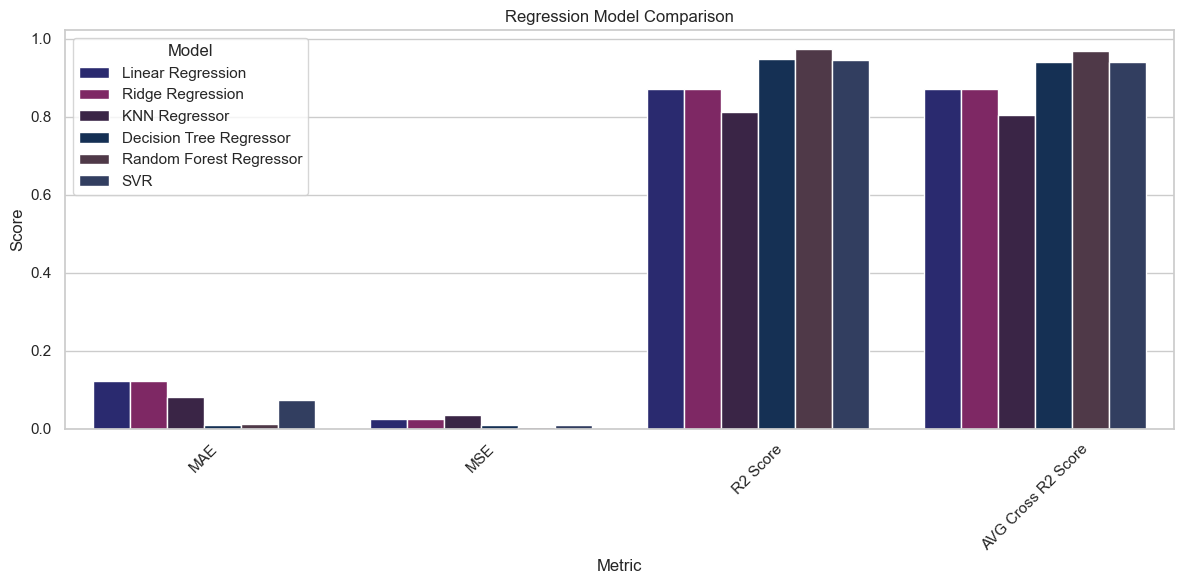

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert regression results DataFrame into long format for visualization
regression_results_melted = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Define a custom dark color palette for distinct model representation
palette = ["#1f1f7a", "#8c1a6a", "#3c1f4b", "#0a2f5f", "#53354a", "#2b3a67"]  # Dark shades

# Create bar plot for each metric across models
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

sns.barplot(x='Metric', y='Score', hue='Model', data=regression_results_melted, palette=palette)
plt.title('Regression Model Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [28]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

# Define your regression models (ensure all previous model definitions are included)
# models = {
#     'Linear Regression': LinearRegression(),
#     'Ridge Regression': Ridge(),
#     'KNN Regressor': KNeighborsRegressor(),
#     'Decision Tree Regressor': DecisionTreeRegressor(),
#     'Random Forest Regressor': RandomForestRegressor(),
#     'SVR': SVR(),
# }

# Create a DataFrame to store regression results
regression_results = {
    'Model': [],
    'Train MAE': [],
    'Validation MAE': [],
    'Train MSE': [],
    'Validation MSE': [],
    'Train R2 Score': [],
    'Validation R2 Score': []
}

# Training loop for regression models
for model_name, reg in models.items():
    print(f'Training {model_name}...')

    # Fit the model to the training data
    reg.fit(X_train_transformed, y_train)
    
    # Predictions for training data
    train_pred = reg.predict(X_train_transformed)
    
    # Calculate training metrics
    train_mae = mean_absolute_error(y_train, train_pred)
    train_mse = mean_squared_error(y_train, train_pred)
    train_r2 = r2_score(y_train, train_pred)
    
    # Create a validation set for cross-validation metrics
    X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_transformed, y_train, test_size=0.2, random_state=42)
    
    # Fit the model to the split training data
    reg.fit(X_train_split, y_train_split)
    
    # Predictions for validation data
    val_pred = reg.predict(X_val_split)
    
    # Calculate validation metrics
    val_mae = mean_absolute_error(y_val_split, val_pred)
    val_mse = mean_squared_error(y_val_split, val_pred)
    val_r2 = r2_score(y_val_split, val_pred)

    # Store results in the DataFrame
    regression_results['Model'].append(model_name)
    regression_results['Train MAE'].append(train_mae)
    regression_results['Validation MAE'].append(val_mae)
    regression_results['Train MSE'].append(train_mse)
    regression_results['Validation MSE'].append(val_mse)
    regression_results['Train R2 Score'].append(train_r2)
    regression_results['Validation R2 Score'].append(val_r2)

    print(f'{model_name} training completed.')
    print('-------------------------------')

# Convert regression results to DataFrame for summary
regression_results_df = pd.DataFrame(regression_results)
print(regression_results_df)


Training Linear Regression...
Linear Regression training completed.
-------------------------------
Training Ridge Regression...
Ridge Regression training completed.
-------------------------------
Training KNN Regressor...
KNN Regressor training completed.
-------------------------------
Training Decision Tree Regressor...
Decision Tree Regressor training completed.
-------------------------------
Training Random Forest Regressor...
Random Forest Regressor training completed.
-------------------------------
Training SVR...
SVR training completed.
-------------------------------
                     Model  Train MAE  Validation MAE  Train MSE  \
0        Linear Regression   0.120000        0.120137   0.023007   
1         Ridge Regression   0.120006        0.120153   0.023008   
2            KNN Regressor   0.060787        0.079688   0.022757   
3  Decision Tree Regressor   0.000000        0.009687   0.000000   
4  Random Forest Regressor   0.004796        0.013947   0.000696   
5     

# Classification

**Binary Classification:** To determine the binary outcome of loan approval, indicating whether an applicant is likely to be approved or denied for a loan.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score



models = {'Naive Bayes': GaussianNB(),
          'Logistic Regression': LogisticRegression(max_iter=1000),
          'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

results = {
    'Model':[],
    'Accuracy': [],
    'AVG Cross Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

for model in models.items():
    print(f'Training {model[0]}...')
    print('...')
    clf = model[1]
    clf.fit(X_train_transformed, y_train)
    y_pred = clf.predict(X_test_transformed)

    accuracy = accuracy_score(y_test, y_pred)
    cross_accuracy = cross_val_score(clf, X_train_transformed, y_train, cv = 5, scoring='accuracy')
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results['Model'].append(model[0])
    results['Accuracy'].append(accuracy)
    results['AVG Cross Accuracy'].append(cross_accuracy.mean())
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1)
    print(f'Training {model[0]} COMPLETED')
    print('-------------------------------')


results_df = pd.DataFrame(results)
results_df

Training Naive Bayes...
...
Training Naive Bayes COMPLETED
-------------------------------
Training Logistic Regression...
...
Training Logistic Regression COMPLETED
-------------------------------
Training KNN...
...
Training KNN COMPLETED
-------------------------------
Training Decision Tree...
...
Training Decision Tree COMPLETED
-------------------------------
Training Random Forest...
...
Training Random Forest COMPLETED
-------------------------------


,Model,Accuracy,AVG Cross Accuracy,Precision,Recall,F1-Score
0,Naive Bayes,0.95350,0.954500,0.876700,0.950836,0.912264
1,Logistic Regression,0.99975,0.999563,0.999018,1.000000,0.999509
2,KNN,0.95975,0.957437,0.979821,0.859390,0.915663
3,Decision Tree,0.99000,0.989250,0.983185,0.977384,0.980276
4,Random Forest,0.99075,0.988375,0.985149,0.978368,0.981746


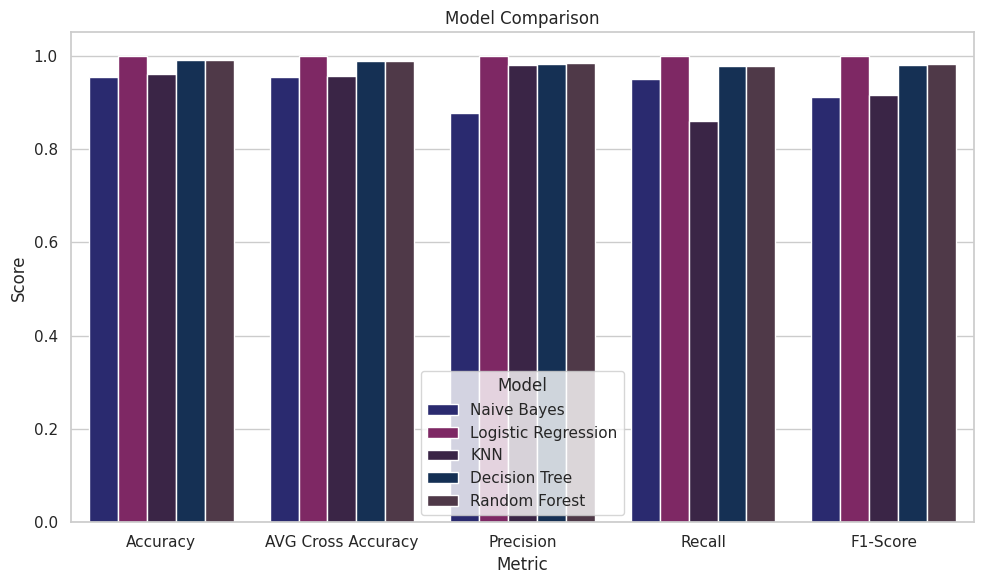

In [ ]:
# Visualize the results
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# Melt the dataframe for better visualization with seaborn
results_melted = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Use a dark color palette with distinct colors
palette = ["#1f1f7a", "#8c1a6a", "#3c1f4b", "#0a2f5f", "#53354a"]  # Dark shades of blue, purple, and burgundy

# Create bar plot for each metric
sns.barplot(x='Metric', y='Score', hue='Model', data=results_melted, palette=palette)
plt.title('Model Comparison')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


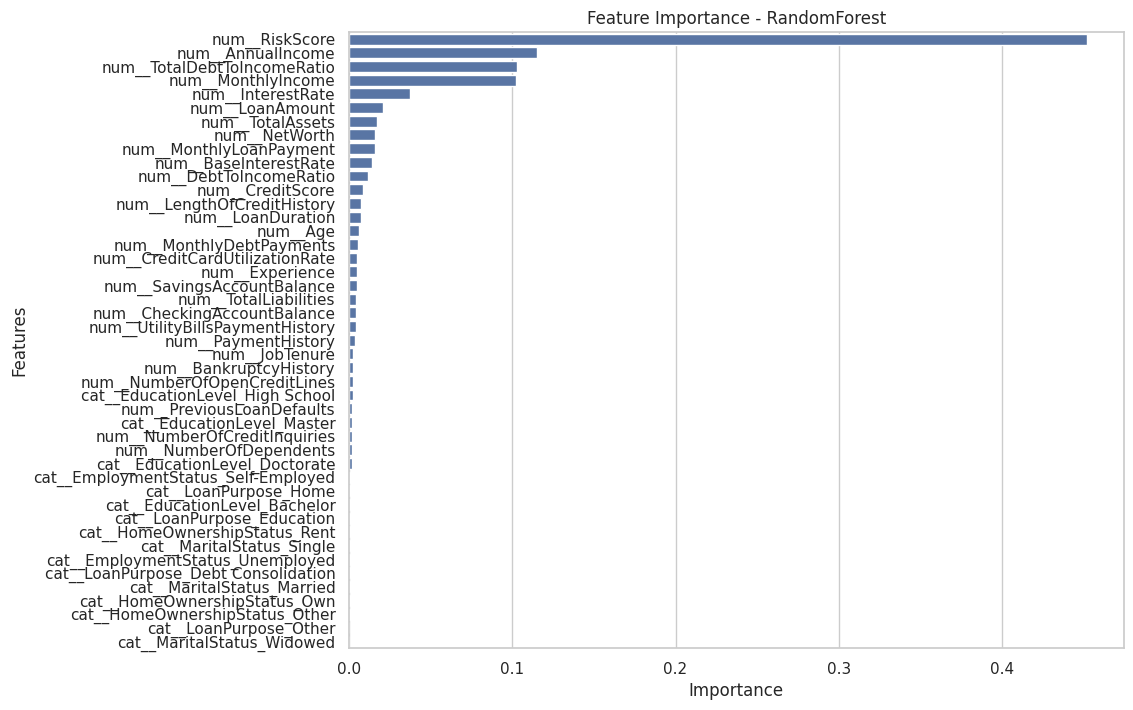

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier()
rf.fit(X_train_transformed, y_train)


importances = rf.feature_importances_

feature_names = preprocessor.get_feature_names_out()


feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 8))
sns.barplot(feature_importance_df, y = 'Feature', x='Importance')
plt.title('Feature Importance - RandomForest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


In [ ]:
import statsmodels.api as sm


# Esegui la regressione logistica con statsmodels
logit_model = sm.Logit(y_train, X_train_transformed)
result = logit_model.fit(maxiter=100)  # Aumenta il numero massimo di iterazioni se necessario

# Mostra i risultati del modello
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.004855
         Iterations 15
                           Logit Regression Results                           
Dep. Variable:           LoanApproved   No. Observations:                16000
Model:                          Logit   Df Residuals:                    15956
Method:                           MLE   Df Model:                           43
Date:                Tue, 29 Oct 2024   Pseudo R-squ.:                  0.9911
Time:                        20:06:57   Log-Likelihood:                -77.687
converged:                       True   LL-Null:                       -8727.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.3324      1.323      1.007      0.314      -1.261       3.926
x2            -0.6121      2

Training Naive Bayes for ROC...
ROC for Naive Bayes COMPLETED
-------------------------------
Training Logistic Regression for ROC...
ROC for Logistic Regression COMPLETED
-------------------------------
Training KNN for ROC...
ROC for KNN COMPLETED
-------------------------------
Training Decision Tree for ROC...
ROC for Decision Tree COMPLETED
-------------------------------
Training Random Forest for ROC...
ROC for Random Forest COMPLETED
-------------------------------


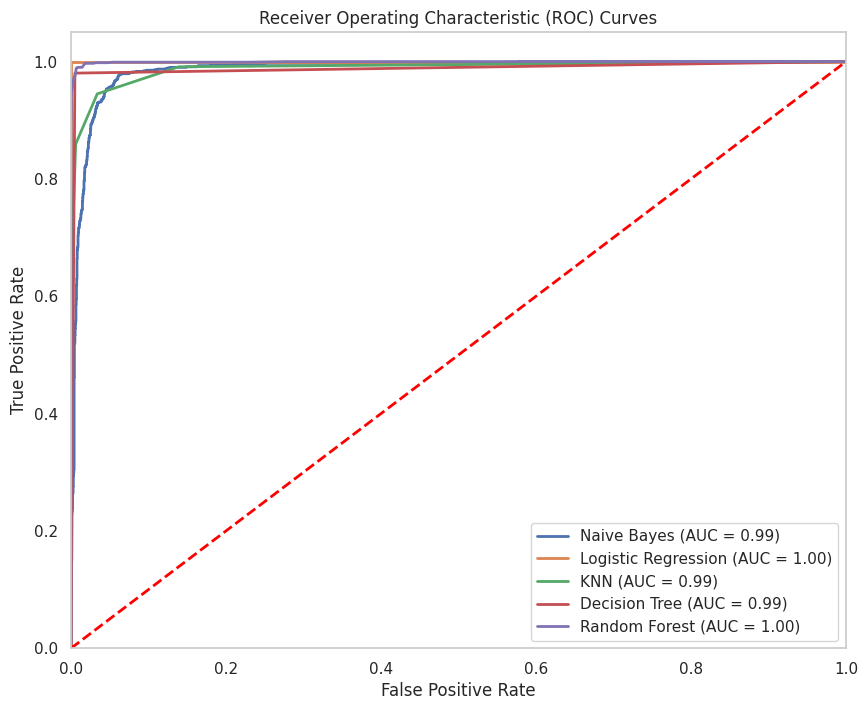

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Create a new DataFrame to store the false positive rate, true positive rate, and AUC for each model
roc_results = {
    'Model': [],
    'FPR': [],
    'TPR': [],
    'AUC': []
}

# Loop through the models to calculate ROC and AUC
for model_name, clf in models.items():
    print(f'Training {model_name} for ROC...')
    clf.fit(X_train_transformed, y_train)
    y_prob = clf.predict_proba(X_test_transformed)[:, 1]  # Get probabilities for the positive class

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)

    # Store results
    roc_results['Model'].append(model_name)
    roc_results['FPR'].append(fpr)
    roc_results['TPR'].append(tpr)
    roc_results['AUC'].append(auc_score)

    print(f'ROC for {model_name} COMPLETED')
    print('-------------------------------')

# Plotting the ROC curves
plt.figure(figsize=(10, 8))
for i in range(len(roc_results['Model'])):
    plt.plot(roc_results['FPR'][i], roc_results['TPR'][i], lw=2, label=f"{roc_results['Model'][i]} (AUC = {roc_results['AUC'][i]:.2f})")

# Plot the diagonal line (random predictions)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier

# Define your models (ensure all previous model definitions are included)
# models = {...}

# Create a DataFrame to store accuracy results
accuracy_results = {
    'Model': [],
    'Train Accuracy': [],
    'Validation Accuracy': []
}

# Training loop for models
for model_name, clf in models.items():
    print(f'Training {model_name}...')

    if isinstance(clf, MLPClassifier):
        # Create a validation set for MLP
        X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_transformed, y_train, test_size=0.2, random_state=42)

        # Train the MLPClassifier for a few epochs (or iterations)
        history = {
            'train_accuracy': [],
            'val_accuracy': []
        }

        for epoch in range(10):  # Number of epochs
            clf.fit(X_train_split, y_train_split)
            train_accuracy = accuracy_score(y_train_split, clf.predict(X_train_split))
            val_accuracy = accuracy_score(y_val_split, clf.predict(X_val_split))

            # Store accuracy for each epoch
            history['train_accuracy'].append(train_accuracy)
            history['val_accuracy'].append(val_accuracy)

        # Plot accuracy for MLPClassifier
        plt.figure(figsize=(6, 4))
        plt.plot(history['train_accuracy'], label='Training Accuracy', color='blue')
        plt.plot(history['val_accuracy'], label='Validation Accuracy', color='orange')
        plt.title(f'{model_name} Accuracy Curve')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid()
        plt.show()

    else:
        # Fit other models and calculate their accuracies
        clf.fit(X_train_transformed, y_train)
        train_accuracy = accuracy_score(y_train, clf.predict(X_train_transformed))
        val_accuracy = cross_val_score(clf, X_train_transformed, y_train, cv=5, scoring='accuracy').mean()

        # Store results in the DataFrame
        accuracy_results['Model'].append(model_name)
        accuracy_results['Train Accuracy'].append(train_accuracy)
        accuracy_results['Validation Accuracy'].append(val_accuracy)

    print(f'Training {model_name} COMPLETED')
    print('-------------------------------')

# Convert accuracy results to DataFrame for summary
accuracy_results_df = pd.DataFrame(accuracy_results)
print(accuracy_results_df)


Training Naive Bayes...
Training Naive Bayes COMPLETED
-------------------------------
Training Logistic Regression...
Training Logistic Regression COMPLETED
-------------------------------
Training KNN...
Training KNN COMPLETED
-------------------------------
Training Decision Tree...
Training Decision Tree COMPLETED
-------------------------------
Training Random Forest...
Training Random Forest COMPLETED
-------------------------------
                 Model  Train Accuracy  Validation Accuracy
0          Naive Bayes        0.954625             0.954500
1  Logistic Regression        0.999687             0.999563
2                  KNN        0.977313             0.957437
3        Decision Tree        1.000000             0.989812
4        Random Forest        1.000000             0.989000
